<a href="https://colab.research.google.com/github/satrakidol/Machine-Learning-DMII-Categorize-Pictures/blob/main/Machine_Learning_DMII_Categorize_Pictures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Κατηγοριοποίηση εικόνων με Νευρωνικά Δίκτυα

Στο notebook αυτό καλείστε να ορίσετε απλά μοντέλα νευρωνικών δικτύων για την κατηγοριοποίηση εικόνων στο σύνολο δεδομένων CIFAR-10. Θα πρέπει να συμπληρώσετε τα κελιά που ανιτστοιχούν στο ορισμό, εκπαίδευση και αξιολόγησης των μοντέλων που αναφέρονται στην εκφώνηση της εργασίας σας.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras.datasets
import matplotlib.pyplot as plt

## Πειράματα στο CIFAR-10

Το CIFAR-10 είναι ένα σύνολο μικρών εικόνων που ανήκουν σε μία από 10 κατηγορίες. Για λεπτομέρειες δείτε το site του dataset:

https://www.cs.toronto.edu/~kriz/cifar.html

Θα το επεξεργαστούμε με τρόπο παρόμοιο με το MNIST, όπως είδαμε στα σχετικά notebooks του μαθήματος. Η διαφορά εδώ είναι ότι το πρόβλημα είναι αρκετά πιο σύνθετο, μιας και έχουμε φυσικά αντικείμενα αντί για χειρόγραφους χαρακτήρες.

"Κατέβασμα" του dataset, φόρτωση στη μνήμη, αλλαγή τύπου δεδομένων και μετασχηματισμός στο [0, 1].

In [ ]:
((x_train, y_train), (x_test, y_test)) = keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

170498071/170498071 [==============================] - 2s 0us/step


Τα δεδομένα εκπαίδευσης περιλαμβάνουν 50000 έγχρωμες (3 κανάλια) εικόνες των 32x32 pixel.

In [ ]:
print(x_train.shape)
print(y_train.shape)


(50000, 32, 32, 3)
(50000, 1)


Για παράδειγμα, η 2η εικόνα του συνόλου εκπαίδευσης:

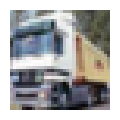

In [ ]:
fig = plt.figure(figsize=(1, 1))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
plt.imshow(x_train[1], interpolation="none")

Τα δεδομένα μας χωρίζονται σε 10 κλάσεις:

In [ ]:
print(y_train[10])
print(np.unique(y_train))

[4]
[0 1 2 3 4 5 6 7 8 9]


Προσπαθήστε να λύσετε το πρόβλημα της κατηγοριοποίησης εικόνων με ένα πλήρως διασυνδεδεμένο νευρωνικό δίκτυο, με 2 κρυφά layers των 20 νευρώνων το καθένα. Για ένα τέτοιο μοντέλο θα πρέπει να μετασχηματίσουμε την είσοδο και την έξοδο. Η είσοδος θα πρέπει να είναι ένα μεγάλο διάνυσμα (αντί για εικόνα), ενώ η έξοδος ένα one-hot vector των 10 στοιχείων:

In [ ]:
x_train_fc = x_train.reshape((x_train.shape[0], x_train[0].shape[0] * x_train[0].shape[1] * x_train[0].shape[2]))
y_train_fc = keras.utils.to_categorical(y_train, num_classes=10)

Έπειτα θα πρέπει να οριστεί το μοντέλο μας:

In [ ]:
print(x_train_fc)

[[0.23137255 0.24313726 0.24705882 ... 0.48235294 0.36078432 0.28235295]
 [0.6039216  0.69411767 0.73333335 ... 0.56078434 0.52156866 0.5647059 ]
 [1.         1.         1.         ... 0.3137255  0.3372549  0.32941177]
 ...
 [0.13725491 0.69803923 0.92156863 ... 0.04705882 0.12156863 0.19607843]
 [0.7411765  0.827451   0.9411765  ... 0.7647059  0.74509805 0.67058825]
 [0.8980392  0.8980392  0.9372549  ... 0.6392157  0.6392157  0.6313726 ]]


In [ ]:
x_train_fc.shape

(50000, 3072)

## Στα παρακάτω κελιά εκπαιδεύστε ένα πλήρως διασυνδεδεμένο νευρωνικό δίκτυο με:
* 2 κρυφά επίπεδα των 20 νευρώνων το καθένα με συνάρτηση ενεργοποίησης ReLU
* 1 τελικό πλήρες διασυνδεδεμένο επίπεδο, με κατάλληλη συνάρτηση ενεργοποίησης
* SGD optimizer με ρυθμό εκμάθησης 0.001 και κατάλληλο loss function
* 20 εποχές εκπαίδευσης με batch size 50 δείγματα

Χρησιμοποιήστε την ```model.summary()``` για να βεβαιωθείτε για την αρχιτεκτονική και να δείτε τις παραμέτρους του μοντέλου.

In [ ]:
# Case 1: Fully connected model

###### DEFINE MODEL HERE ######
num_classes = 10

model = keras.Sequential([
    layers.Input(shape=(3072,)),
    layers.Dense(20, activation='relu', ),
    layers.Dense(20, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                61460     
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
Total params: 62,090
Trainable params: 62,090
Non-trainable params: 0
_________________________________________________________________


**Ερώτηση:** Πως προκύπτει ο αριθμός των παραμέτρων του κάθε επιπέδου;



Το πρώτο επίπεδο έχει 20 νευρώνες και η είσοδός του είναι ένα διάνυσμα της μορφής (3072,). Όπως μας έδειξε η εντολή shape. Κάθε νευρώνας στο επίπεδο 1 συνδέεται με όλες τις εισόδους, οπότε ο αριθμός των παραμέτρων είναι 3072 * 20 = 61,460.
Επιπλέον, για κάθε νευρώνα, υπάρχει το bias που προστίθεται στον υπολογισμό της εξόδου του. Έτσι, για 20 νευρώνες, έχουμε 20 παραμέτρους bias που προστίθενται. Άρα, συνολικά, το layer 1 έχει 61,460 + 20 = 61,480 παραμέτρους.
Το δεύτερο επίπεδο έχει επίσης 20 νευρώνες και η είσοδός του είναι τα 20 χαρακτηριστικά από το layer 1. Ο αριθμός των παραμέτρων υπολογίζεται ως 20 * 20 = 400 για τους συντελεστές σύνδεσης και 20 το bias. Συνολικά, το layer 2 έχει 400 + 20 = 420 παραμέτρους.
Το τρίτο επίπεδο είναι ουσιαστικά ο ταξινομητής του μοντέλου και έχει 10 νευρώνες (καθένας αντιπροσωπεύει μια κλάση). Η είσοδός του είναι τα 20 χαρακτηριστικά από το layer 2. Ο αριθμός των παραμέτρων υπολογίζεται ως 20 * 10 = 200 για τους συντελεστές σύνδεσης και 10 για το bias. Συνολικά, το Dense 3 έχει 200 + 10 = 210 παραμέτρους.
Έτσι, συνολικά το μοντέλο έχει 61,480 + 420 + 210 = 62,090 παραμέτρους.


Ορίζουμε παρακάτω τις παραμέτρους εκπαίδευσης του μοντέλου με την μέθοδο ```compile()``` και το εκπαιδεύουμε με την μέθοδο ```fit()```.

In [ ]:
###### COMPILE MODEL HERE ( .compile() )######

model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=0.001), metrics=["accuracy"])

###### TRAIN MODEL HERE ( .fit() ) ######

model.fit(x_train_fc, y_train_fc, epochs=20, batch_size=50)

Epoch 1/20
1000/1000 [==============================] - 8s 3ms/step - loss: 2.2455 - accuracy: 0.1602
Epoch 2/20
1000/1000 [==============================] - 3s 3ms/step - loss: 2.1551 - accuracy: 0.1990
Epoch 3/20
1000/1000 [==============================] - 3s 3ms/step - loss: 2.0762 - accuracy: 0.2297
Epoch 4/20
1000/1000 [==============================] - 3s 3ms/step - loss: 2.0089 - accuracy: 0.2700
Epoch 5/20
1000/1000 [==============================] - 3s 3ms/step - loss: 1.9577 - accuracy: 0.2998
Epoch 6/20
1000/1000 [==============================] - 4s 4ms/step - loss: 1.9204 - accuracy: 0.3179
Epoch 7/20
1000/1000 [==============================] - 3s 3ms/step - loss: 1.8939 - accuracy: 0.3296
Epoch 8/20
1000/1000 [==============================] - 3s 3ms/step - loss: 1.8729 - accuracy: 0.3415
Epoch 9/20
1000/1000 [==============================] - 3s 3ms/step - loss: 1.8548 - accuracy: 0.3471
Epoch 10/20
1000/1000 [==============================] - 4s 4ms/step - loss: 1.840

Μετασχηματίζουμε τα δεδομένα δοκιμής

In [ ]:
x_test_fc = x_test.reshape((x_test.shape[0], x_test[0].shape[0] * x_test[0].shape[1] * x_test[0].shape[2]))
y_test_fc = keras.utils.to_categorical(y_test, num_classes=10)
print(y_test_fc[0])
print(x_test_fc[0].shape)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
(3072,)


και αξιολογούμε το μοντέλο μας:

In [ ]:
###### EVALUATE MODEL HERE ( .evaluate() ) ######

score = model.evaluate(x_test_fc, y_test_fc, verbose = 'auto')

print("Test loss:", score[0])
print("Test accuracy:", score[1])


313/313 [==============================] - 1s 3ms/step - loss: 1.7438 - accuracy: 0.3895
Test loss: 1.7437750101089478
Test accuracy: 0.3894999921321869


## Στα παρακάτω κελιά εκαπιδεύστε ένα συνελικτικό νευρωνικό δίκτυο με:
* 2 συνελικτικά επίπεδα των 16 και 32 φίλτρων με συνάρτηση ενεργοποίησης RelU
* 2 ενδιάμεσα επίπεδα συγκέντρωσης
* 1 επίπεδο Flatten
* 1 τελικό πλήρες διασυνδεδεμένο επίπεδο, με κατάλληλη συνάρτηση ενεργοποίησης
* Adam optimizer με ρυθμό εκμάθησης 0.001 και κατάλληλο loss function
* 20 εποχές εκπαίδευσης με batch size 50 δείγματα

Για τα επίπεδα συγκέντρωσης χρησιμοποιήστε επίπεδα ```MaxPooling2D()```.

Χρησιμοποιήστε την ```model.summary()``` για να βεβαιωθείτε για την αρχιτεκτονική και να δείτε τις παραμέτρους του μοντέλου.

In [ ]:
# Case 2: Convolutional Neural Network

###### DEFINE MODEL HERE ######

model = keras.Sequential(
[
keras.Input(shape=(32, 32, 3)),
layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
layers.MaxPooling2D(pool_size=(2, 2)),
layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
layers.MaxPooling2D(pool_size=(2, 2)),
layers.Flatten(),
layers.Dense(num_classes, activation="softmax"),
]
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense_3 (Dense)             (None, 10)               

**Ερώτηση:** Σ' αυτή την περίπτωση, πως προκύπτει ο αριθμός των παραμέτρων;

Το πρώτο επίπεδο (Conv2D) έχει 16 φίλτρα με μέγεθος (3, 3). Κάθε φίλτρο έχει 3 (το πλάτος) * 3 (το ύψος) * 3 (το βάθος των εισόδων) + 1 (το bias) = 28 παραμέτρους. Άρα συνολικά έχουμε 16 * 28 = 448 παραμέτρους.
Το δεύτερο επίπεδο ( MaxPooling2D) δεν έχει παραμέτρους, απλώς μειώνει τις διαστάσεις των εισόδων.
Το τρίτο επίπεδο (Conv2D) έχει 32 φίλτρα με μέγεθος (3, 3). Κάθε φίλτρο έχει 16 (το πλάτος της προηγούμενης εξόδου) * 16 (το ύψος της προηγούμενης εξόδου) * 16 (το βάθος της προηγούμενης εξόδου) + 1 (το bias) = 4640 παραμέτρους.
Το τέταρτο επίπεδο ( MaxPooling2D) δεν έχει παραμέτρους, απλώς μειώνει τις διαστάσεις των εισόδων.
Το πέμπτο επίπεδο ( Flatten) δεν έχει παραμέτρους. Απλώς μετατρέπει τις πολυδιάστατες εξόδους σε μία επίπεδη μορφή.
Το έκτο επίπεδο έχει 1152 (το πλάτος της εξόδου του Flatten) παραμέτρους * 10 (τον αριθμό των κλάσεων) + 10 (τα biases) = 11.530 παραμέτρους.
Άρα, ο συνολικός αριθμός των παραμέτρων στο μοντέλο είναι:
448 + 4640 + 11.530 = 16.618


Εκπαιδεύουμε το μοντέλο μας. Προσοχή, εδώ η είσοδος στην μέθοδο ```.fit()``` είναι οι εικόνες (x_train) και όχι τα διανύσματα (x_train_fc).

In [ ]:
###### COMPILE MODEL HERE ( .compile() )######

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

y_test_fc = keras.utils.to_categorical(y_train, num_classes=10)


###### TRAIN MODEL HERE ( .fit() ) ######

model.fit(x_train, y_test_fc, batch_size=50, epochs=20)

Epoch 1/20
1000/1000 [==============================] - 10s 3ms/step - loss: 1.5721 - accuracy: 0.4405
Epoch 2/20
1000/1000 [==============================] - 6s 6ms/step - loss: 1.2670 - accuracy: 0.5571
Epoch 3/20
1000/1000 [==============================] - 6s 6ms/step - loss: 1.1532 - accuracy: 0.6015
Epoch 4/20
1000/1000 [==============================] - 6s 6ms/step - loss: 1.0825 - accuracy: 0.6249
Epoch 5/20
1000/1000 [==============================] - 3s 3ms/step - loss: 1.0341 - accuracy: 0.6432
Epoch 6/20
1000/1000 [==============================] - 3s 3ms/step - loss: 1.0012 - accuracy: 0.6540
Epoch 7/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.9712 - accuracy: 0.6649
Epoch 8/20
1000/1000 [==============================] - 4s 4ms/step - loss: 0.9483 - accuracy: 0.6732
Epoch 9/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.9255 - accuracy: 0.6802
Epoch 10/20
1000/1000 [==============================] - 4s 4ms/step - loss: 0.90

... και αξιολογούμε στα δεδομένα (x_test, y_test_fc)

In [ ]:
y_test_fc = keras.utils.to_categorical(y_test, num_classes=10)

In [ ]:
###### EVALUATE MODEL HERE ( .evaluate() ) ######

score = model.evaluate(x_test, y_test_fc, verbose= 'auto')
print("Test loss:", score[0])
print("Test accuracy:", score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.9567 - accuracy: 0.6803
Test loss: 0.956712007522583
Test accuracy: 0.6802999973297119


Με την χρήση πλήρως διασυνδεδεμένου νευρωνικού δικτύου πετύχαμε Test loss: 1.7373459339141846 και Test accuracy: 0.3831999897956848

Με την χρήση συνελικτικού νευρωνικού δικτύου πετύχαμε πολύ καλύτερα αποτελέσματα με Test loss: 0.9351696372032166 και Test accuracy: 0.6620000004768372

**Ερώτηση:** Τι παρατηρείτε σχετικά με τον αριθμό παραμέτρων και την επίδοση του κάθε δικτύου; Πως εξηγείτε τις παρατηρήσεις σας; Όπως αναφέρεται και στην εκφώνηση, πειραματιστείτε με διαφορετικές αρχιτεκτονικές, διαφορετικό αριθμό minibatches, εποχών, καθώς και διαφορετικές τιμές του learning rate.

#3.3 Πειραματισμός για την ανάπτυξη μοντέλων νευρωνικών δικτύων

### **Καλή επιτυχία!**

# Fully connected model experiments


In [ ]:
#with 3 secret layers
num_classes = 10

model = keras.Sequential([
    layers.Input(shape=(3072,)),
    layers.Dense(20, activation='relu', ),
    layers.Dense(20, activation='relu', ),
    layers.Dense(20, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])


model.summary()

model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=0.001), metrics=["accuracy"])


###### TRAIN MODEL HERE ( .fit() ) ######

model.fit(x_train_fc, y_train_fc, epochs=20, batch_size=50)

x_test_fc = x_test.reshape((x_test.shape[0], x_test[0].shape[0] * x_test[0].shape[1] * x_test[0].shape[2]))
y_test_fc = keras.utils.to_categorical(y_test, num_classes=10)

score = model.evaluate(x_test_fc, y_test_fc, verbose = 'auto')

print("Test loss:", score[0])
print("Test accuracy:", score[1])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 20)                61460     
                                                                 
 dense_5 (Dense)             (None, 20)                420       
                                                                 
 dense_6 (Dense)             (None, 20)                420       
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
Total params: 62,510
Trainable params: 62,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1000/1000 [==============================] - 4s 3ms/step - loss: 2.2751 - accuracy: 0.1574
Epoch 2/20
1000/1000 [==============================] - 3s 3ms/step - loss: 2.19

Με 3 κρυφά επιπεδα είχαμε χειρότερα αποτελέσματα

In [ ]:
#with 4 secret layers
num_classes = 10

model = keras.Sequential([
    layers.Input(shape=(3072,)),
    layers.Dense(20, activation='relu', ),
    layers.Dense(20, activation='relu', ),
    layers.Dense(20, activation='relu', ),
    layers.Dense(20, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])


model.summary()

model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=0.001), metrics=["accuracy"])


###### TRAIN MODEL HERE ( .fit() ) ######

model.fit(x_train_fc, y_train_fc, epochs=20, batch_size=50)

x_test_fc = x_test.reshape((x_test.shape[0], x_test[0].shape[0] * x_test[0].shape[1] * x_test[0].shape[2]))
y_test_fc = keras.utils.to_categorical(y_test, num_classes=10)

score = model.evaluate(x_test_fc, y_test_fc, verbose = 'auto')

print("Test loss:", score[0])
print("Test accuracy:", score[1])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 20)                61460     
                                                                 
 dense_9 (Dense)             (None, 20)                420       
                                                                 
 dense_10 (Dense)            (None, 20)                420       
                                                                 
 dense_11 (Dense)            (None, 20)                420       
                                                                 
 dense_12 (Dense)            (None, 10)                210       
                                                                 
Total params: 62,930
Trainable params: 62,930
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1000/1000 [============================

Υπήρξε μία μικρή βελτιώση με την προσθήκη 4ου επιπέδου

In [ ]:
# Με 30 νευρώνες σε κάθε επίπεδο

num_classes = 10

model = keras.Sequential([
    layers.Input(shape=(3072,)),
    layers.Dense(30, activation='relu', ),
    layers.Dense(30, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])


model.summary()

model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=0.001), metrics=["accuracy"])


###### TRAIN MODEL HERE ( .fit() ) ######

model.fit(x_train_fc, y_train_fc, epochs=20, batch_size=50)

x_test_fc = x_test.reshape((x_test.shape[0], x_test[0].shape[0] * x_test[0].shape[1] * x_test[0].shape[2]))
y_test_fc = keras.utils.to_categorical(y_test, num_classes=10)

score = model.evaluate(x_test_fc, y_test_fc, verbose = 'auto')

print("Test loss:", score[0])
print("Test accuracy:", score[1])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 30)                92190     
                                                                 
 dense_14 (Dense)            (None, 30)                930       
                                                                 
 dense_15 (Dense)            (None, 10)                310       
                                                                 
Total params: 93,430
Trainable params: 93,430
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1000/1000 [==============================] - 4s 3ms/step - loss: 2.2320 - accuracy: 0.1688
Epoch 2/20
1000/1000 [==============================] - 3s 3ms/step - loss: 2.1062 - accuracy: 0.2322
Epoch 3/20
1000/1000 [==============================] - 3s 3ms/step - loss: 2.0124 - accuracy: 0.2707
Epoch 4/

Ούτε η προσθήκη νευρώνων έκανε διαφορά

In [ ]:
# Με optimizer=adam και learning_rate=0.01

num_classes = 10

model = keras.Sequential([
    layers.Input(shape=(3072,)),
    layers.Dense(20, activation='relu', ),
    layers.Dense(20, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])


model.summary()

model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=["accuracy"])

###### TRAIN MODEL HERE ( .fit() ) ######

model.fit(x_train_fc, y_train_fc, epochs=20, batch_size=50)

x_test_fc = x_test.reshape((x_test.shape[0], x_test[0].shape[0] * x_test[0].shape[1] * x_test[0].shape[2]))
y_test_fc = keras.utils.to_categorical(y_test, num_classes=10)

score = model.evaluate(x_test_fc, y_test_fc, verbose = 'auto')

print("Test loss:", score[0])
print("Test accuracy:", score[1])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 20)                61460     
                                                                 
 dense_17 (Dense)            (None, 20)                420       
                                                                 
 dense_18 (Dense)            (None, 10)                210       
                                                                 
Total params: 62,090
Trainable params: 62,090
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1000/1000 [==============================] - 5s 3ms/step - loss: 2.3144 - accuracy: 0.1001
Epoch 2/20
1000/1000 [==============================] - 3s 3ms/step - loss: 2.3035 - accuracy: 0.1004
Epoch 3/20
1000/1000 [==============================] - 3s 3ms/step - loss: 2.3040 - accuracy: 0.0989
Epoch 4/

Η παραπάνω δοκιμή έφερε αρκετά χειρότερα αποτελέσματα